In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from dateutil import parser as dtparser
%matplotlib notebook

In [2]:
# Load CSV
csv_data = pd.read_csv('SalesData.csv',
                       index_col='Day',
                       parse_dates=['Day', 'Fiscal Week'],
                       date_parser=lambda s: dtparser.parse(s).date())
csv_data.head()

,Fiscal Season,SeasonDesc,Fiscal Year,Fiscal Week,Dayofweek,Class,ClassDesc,Location,Locdesc,SalesU,SalesD
Day,,,,,,,,,,,
2016-01-31,20161,Spring 2016,2016,2016-02-06,Sunday,10,SUNGLASSES,2061,TIMES SQUARE,2,60
2016-01-31,20161,Spring 2016,2016,2016-02-06,Sunday,15,FASHION ACCESSORIES,2061,TIMES SQUARE,1,18
2016-01-31,20161,Spring 2016,2016,2016-02-06,Sunday,18,HATS,2061,TIMES SQUARE,1,12
2016-01-31,20161,Spring 2016,2016,2016-02-06,Sunday,25,FASHION JEWELRY,2061,TIMES SQUARE,-1,-35
2016-01-31,20161,Spring 2016,2016,2016-02-06,Sunday,26,NECKLACES,2061,TIMES SQUARE,11,231


In [3]:
# Filter Class=10 Sales Units
class10_sales_data = csv_data.query('Class==10').SalesD.astype('float')
class10_sales_data.head(10)

Day
2016-01-31     60.0
2016-02-01     72.0
2016-02-02     90.0
2016-02-03     85.0
2016-02-04     60.0
2016-02-05     90.0
2016-02-06     30.0
2016-02-07     29.0
2016-02-12    120.0
2016-02-13    254.0
Name: SalesD, dtype: float64

In [4]:
# Fill in missing values (some dates are missing in the index)
start_date = class10_sales_data.index[0].date()
end_date = class10_sales_data.index[-1].date()
date_range = pd.date_range(start_date, end_date)
X = class10_sales_data.reindex(date_range, fill_value=0).values
X.shape

(735,)

In [5]:
# Divide into train and test
train = X[:600]
test = X[600:]
train.size, test.size

(600, 135)

In [6]:
# Forecast using ARIMA
from statsmodels.tsa.arima_model import ARIMA

history = list(train)
predicted = []
for i in range(len(test)):
    if (i+1) % 10 == 0:
        print("Forecasting #{}".format(i+1))
    predicted.append(ARIMA(history, order=(5,1,0)).fit().forecast()[0])
    history.append(test[i])

Forecasting #10
Forecasting #20
Forecasting #30
Forecasting #40
Forecasting #50
Forecasting #60
Forecasting #70
Forecasting #80
Forecasting #90
Forecasting #100
Forecasting #110
Forecasting #120
Forecasting #130


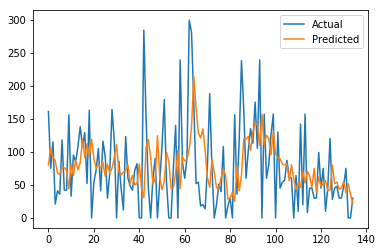

In [7]:
# Let's see the predictions compared to actual values
plt.plot(test, label='Actual')
plt.plot(predicted, label='Predicted')
plt.legend()

In [10]:
# Calculate errors
from sklearn.metrics import mean_squared_error

mse = mean_squared_error(test, predicted)
print("MSE = {:.4f}".format(mse))

MSE = 4576.7771
